# **Customer Conversion Prediction**
Problem Statement
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

# **Basic Analysis of Dataset from Problem Statement**

It is a supervised learning problem - We are predicting target variable From target varible we can clearly understand it is a classification problem From target variable we can tell it is a binary classification problem.

#  **Importing Initial Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [105]:
data = pd.read_csv("/content/train (1).csv")

# **Data Analysis**

In [8]:
# Checking the size
data.shape

(45211, 11)

In [9]:
# Fetching the top 5 rows
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [10]:
# Fetching the bottom 5 rows
data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [11]:
# Getting the basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [12]:
# Finding Column Names
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# **Finding Unique values of each** **column**

In [13]:
for i in data.columns:
  print(i)
  print(data[i].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education_qual
['tertiary' 'secondary' 'unknown' 'primary']
call_type
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur
[ 261  151   76 ... 1298 1246 1556]
num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


We can see from above result that all values are unique meaning there are no no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

In [14]:
# Identifing integer columns
number = data.select_dtypes(include=[np.number])
number.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [15]:
# Identifing category columns
string = data.select_dtypes(include=['object']).columns
string

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

In [16]:
# Checking for correct datatypes
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [17]:
# checking the unknown priority
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
 # Replacing the unknown values
data.job = data.job.str.replace("unknown","blue-collar")

In [19]:
# Checking the unknown has been replaced or not
data.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [20]:
# Checking for unknown priority
data.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [21]:
# Replacing the unknown values
data.education_qual = data.education_qual.str.replace("unknown","secondary")

In [22]:
# Checking for the unknown value replaced or not
data.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [23]:
# Unknown value is large so it is defined as a category
data.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [24]:
# Unknown value is large so it is defined as a category
data.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

# **Balanced/Imbalanced**

In [25]:
# checking whether the data is balanced or not
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

As we can see that the dataset is imbalanced from the above result.

In [26]:
# Find the sum of y variable
d = pd.Series({'no': 39922, 'yes': 5289})
total = d.sum()

print(total)

# Finding the percentage of the data
print('Percentage for "no": ',((39922) / (39922+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39922+5289)) * 100 )

45211
Percentage for "no":  88.30151954170445
Percentage for "yes":  11.698480458295547


We can see the percentage for no being very high so the Majority class is "no" with 88.29% and Minority class is "yes" with 11.7%

# **Exploration** **of** **the** **dataset**

In [27]:
# Converting catergorical target column into numerical
data['y'] = data["y"].map({"yes":1 , "no": 0})

In [28]:
# Checking the target values are converted into numerical values or not
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [29]:
# Checking whether the target column has converted into integer(int64)
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# **Data Cleaning**

### **Missing Values**

In [30]:
# Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### **Duplicate Values**

In [31]:
# Checking for no of duplicate values
data.duplicated().sum()

6

There are 6 duplicates in data that needs to be removed

In [32]:
# Droping duplicates
data = data.drop_duplicates()

In [33]:
# Checking after droping the duplicates
data.duplicated().sum()

0

In [34]:
# Checking the shape of dataset
data.shape

(45205, 11)

In [35]:
# Describing the data
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


### **Detecting** **Outliers**

In [36]:
# Detcting outliers for 'AGE' column
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.age.quantile(0.75) + (1.5*iqr)
low_threshold = data.age.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.age =data.age.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Converting the 'age' column to int64
data['age'] = data['age'].astype('int64')

# Counting the number of outliers above and below the thresholds
below = data[data['age'] < low_threshold]['age'].count()
above = data[data['age'] > up_threshold]['age'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 15.0
upper_threshold is 70.5
lower_threshold is 10.5
above outlier count is 0
below outlier count is 0


In [37]:
# Detcting outliers for 'DUR' column
iqr = data.dur.quantile(0.75) - data.dur.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.dur.quantile(0.75) + (1.5*iqr)
low_threshold = data.dur.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.dur =data.dur.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Counting the number of outliers above and below the thresholds
below = data[data['dur'] < low_threshold]['dur'].count()
above = data[data['dur'] > up_threshold]['dur'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 216.0
upper_threshold is 643.0
lower_threshold is -221.0
above outlier count is 0
below outlier count is 0


In [38]:
# Detcting outliers for 'NUM_CALLS' column
iqr = data.num_calls.quantile(0.75) - data.num_calls.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.num_calls.quantile(0.75) + (1.5*iqr)
low_threshold = data.num_calls.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.num_calls =data.num_calls.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Counting the number of outliers above and below the thresholds
below = data[data['num_calls'] < low_threshold]['num_calls'].count()
above = data[data['num_calls'] > up_threshold]['num_calls'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 2.0
upper_threshold is 6.0
lower_threshold is -2.0
above outlier count is 0
below outlier count is 0


In [39]:
# Describing num of calls
data.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [40]:
# Describing the dataset
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235,0.117000
std,10.380009,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.000000,31.00000,643.00000,6.000000,1.000000


In [41]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# **EDA - Exploratory Data Analysis**

### **Distribution of Feature and Target variable**

Text(0, 0.5, 'Count')

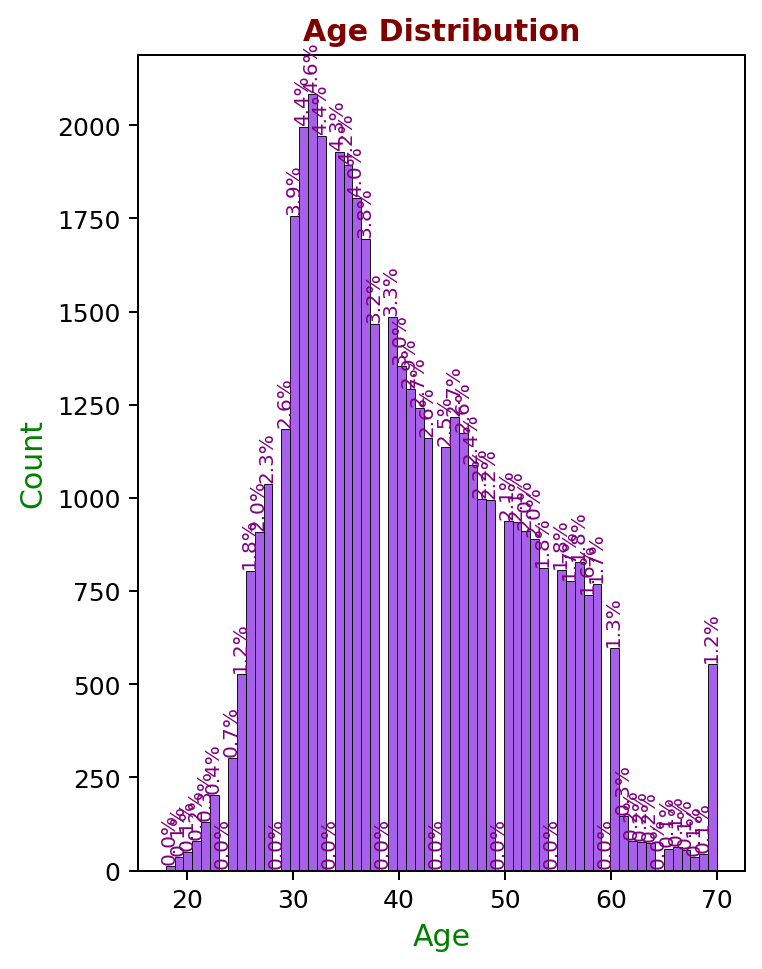

In [42]:
# Age distribution
plt.figure(figsize = (20,20),dpi=180)
plt.subplot(3,4,1)
sns.histplot((data.age),color='BlueViolet')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['age']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Age Distribution', fontsize = 12, color='maroon', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')

1. Age
Most Target : 30 to 40 years
Least Target : belove 20 and above 60

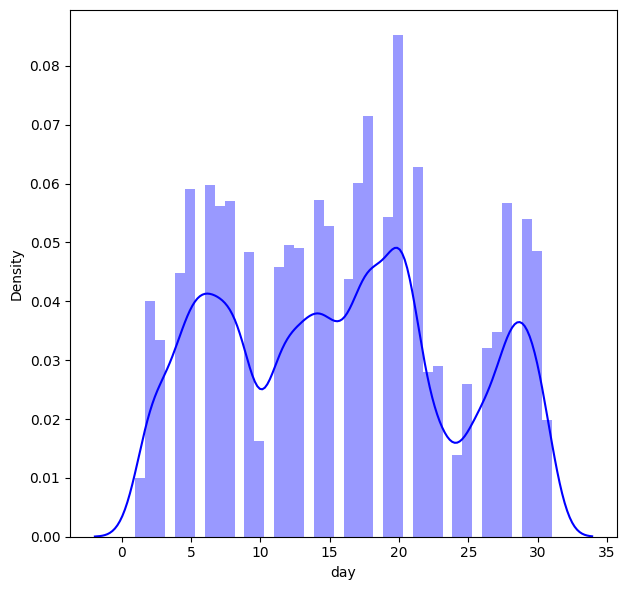

In [43]:
# Creating a plot to check the distribution for DAY
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.distplot(data.day,color = 'blue')
plt.tight_layout()

The day distributed between 1 to 31 days

<Axes: xlabel='dur', ylabel='Density'>

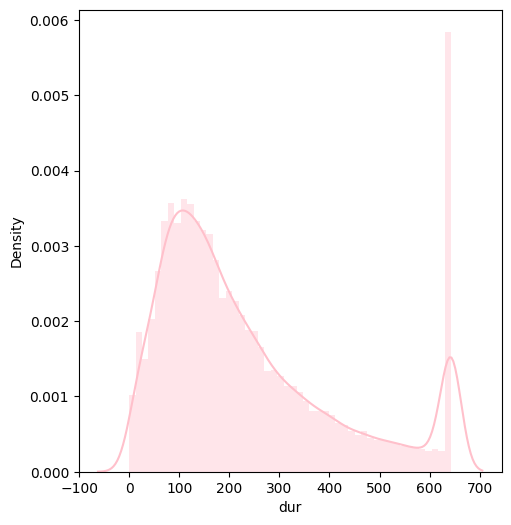

In [44]:
# Creating a plot to check the distribution for DUR
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.dur, color = 'pink')

The duration between 0 to 650

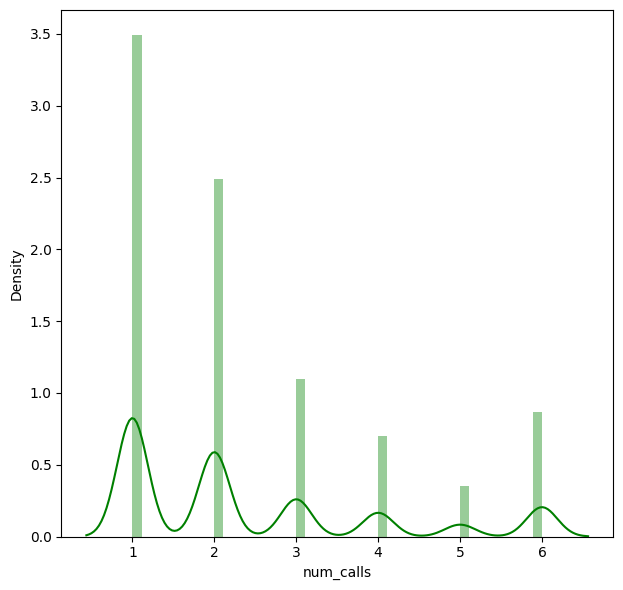

In [45]:
# Creating a plot to check the distribution for NUM_CALLS
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.distplot(data.num_calls,color = 'green')
plt.tight_layout()

The number of calls is distributed between 1 to 6

# **Feature** **vs** **Target**

### **Job**

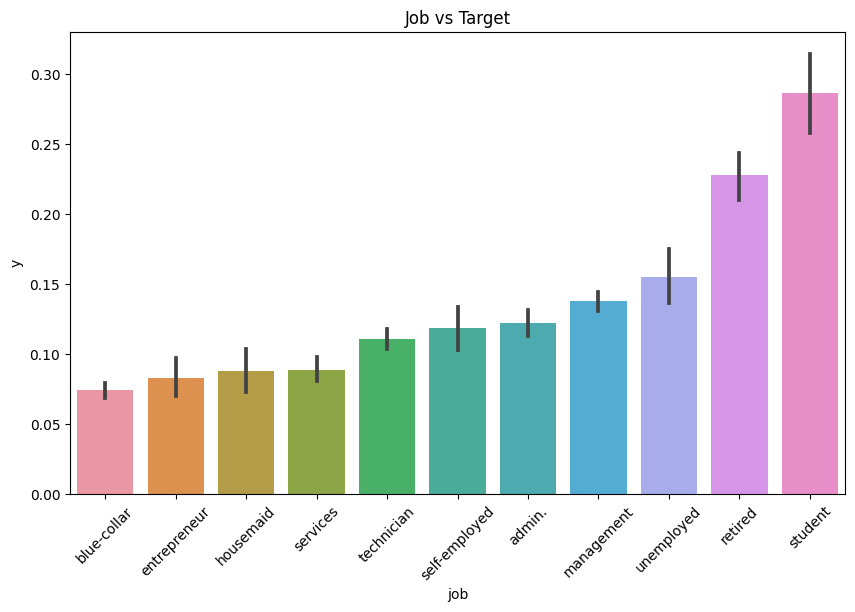

In [46]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=45)
plt.title('Job vs Target')
plt.show()

Students are targeted more compared with other professions, second highest is retired persons we can see a linear increase in job column so we go with label encoding.

{'blue-collar' :0, 'entrepreneur' :1, 'housemaid' :2, 'services' :3, 'technician' :4, 'self-employed' :5, 'admin.' :6, 'management' :7, 'unemployed' :8, 'retired' :9, 'student' :10}

### **Marital**

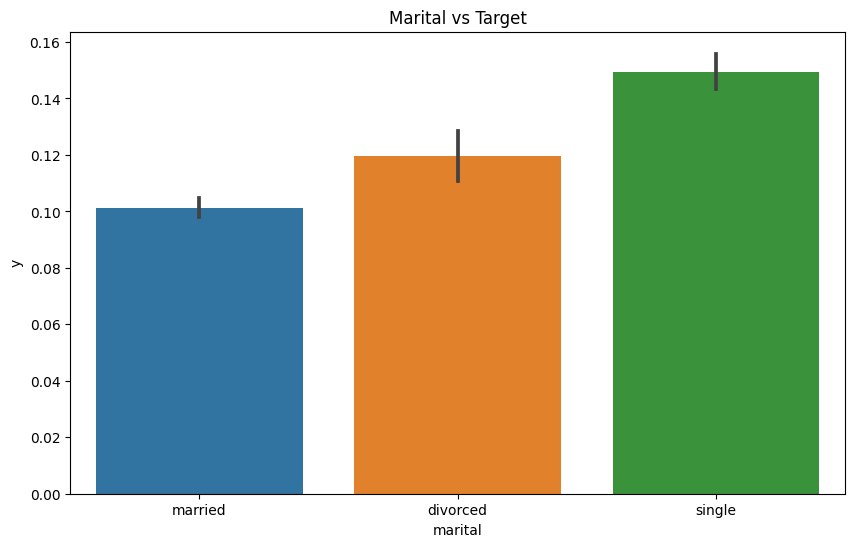

In [47]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=0)
plt.title('Marital vs Target')
plt.show()

Single category has subsribed to insurance other than married and divorced there is a linear increase

{'married' :0, 'divorced' :1, 'single' :2}

### **Education** **Qualification**

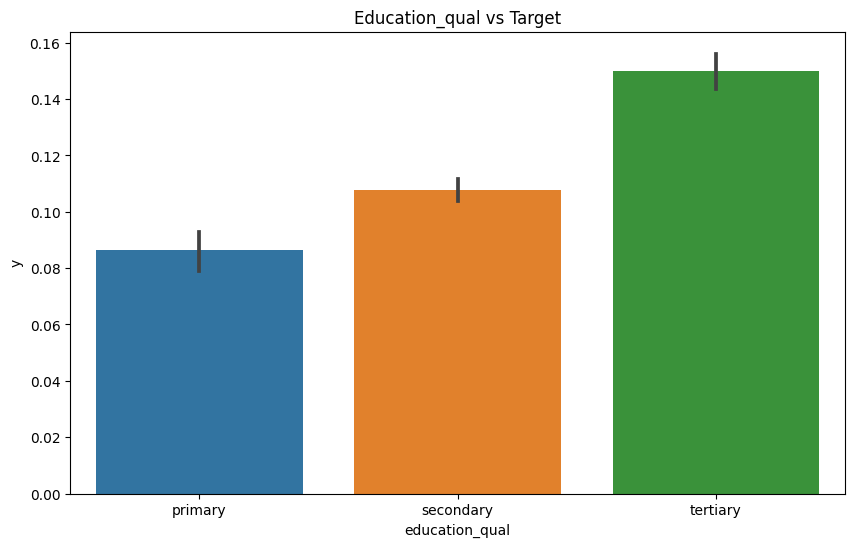

In [48]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=0)
plt.title('Education_qual vs Target')
plt.show()

Tertiary category is intrested more to subscribe to the insurance other than primary and secondary, we can see a linear increase, so we can use label encoding.

{'primary' :0, 'secondary' :1, 'tertiary' :2}

### **Call** **Type**

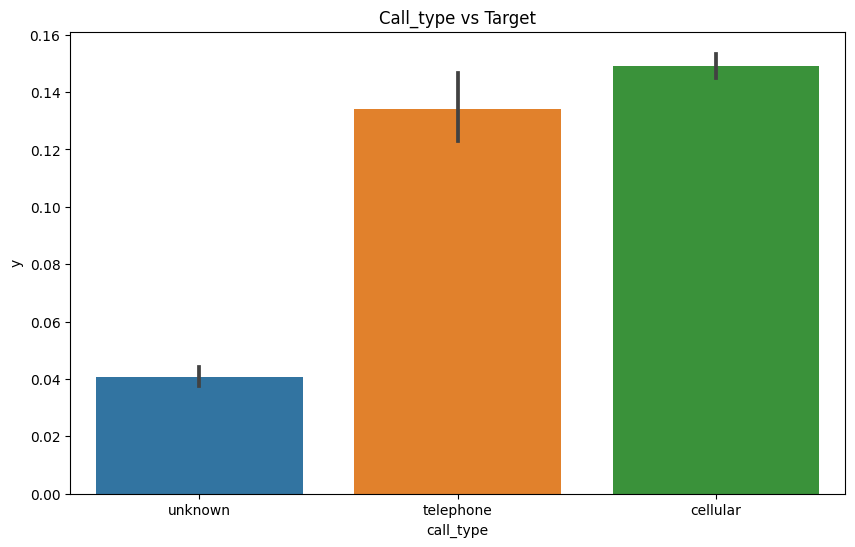

In [49]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=0)
plt.title('Call_type vs Target')
plt.show()

We can see, through cellular the most calls were registered and subscribed to insurance plan , there is no linear increase so we go with one-hot encoding.

{'unknown' :0, 'telephone' :1, 'cellular' :2}

### **Month(Mon)**

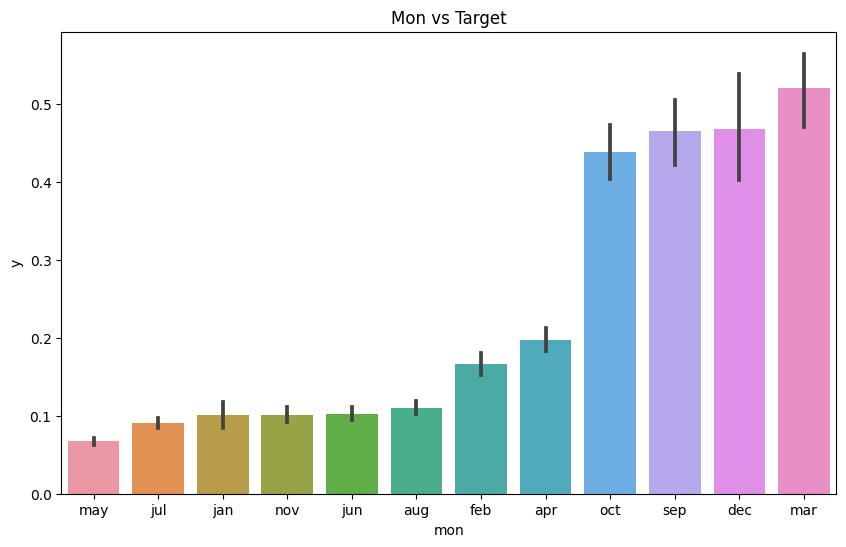

In [50]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=0)
plt.title('Mon vs Target')
plt.show()

We can see that month of march, have more insurance policy subscribed.

{'may' :0, 'jul' :1, 'jan' :2, 'nov' :3, 'jun' :4, 'aug' :5, 'feb' :6, 'apr' :7, 'oct' :8, 'sep' :9, 'dec' :10, 'mar' :11}

### **Prev** **Outcome**

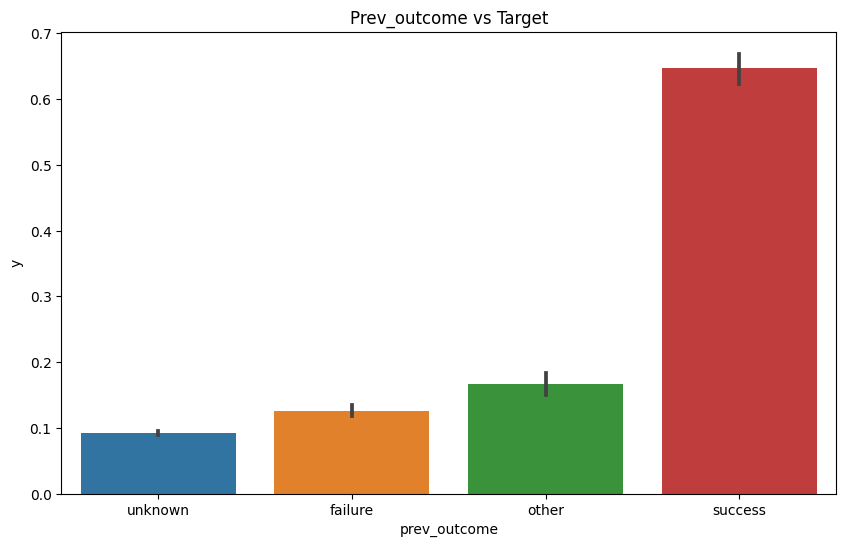

In [51]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=0)
plt.title('Prev_outcome vs Target')
plt.show()

Success rate is higher for the previous oucome column

# **Numerical Data**

# **Age**

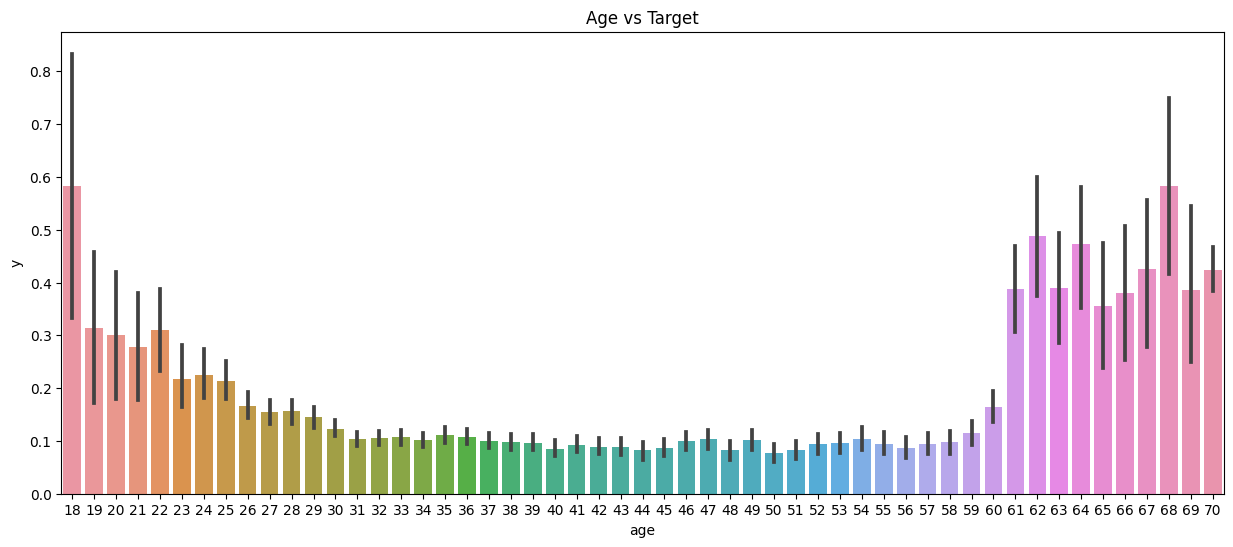

In [52]:
# Plotting the figure using barplot
sorted_age = sorted(data['age'].unique())
plt.figure(figsize=(15,6))
sns.barplot(x='age', y='y', data=data, order=sorted_age)
plt.xticks(rotation=0)
plt.title('Age vs Target')
plt.show()

# **Day**

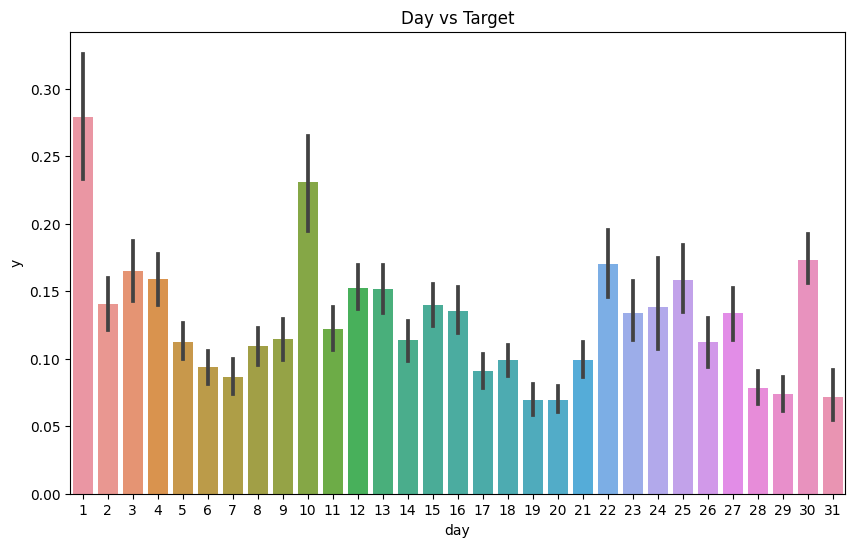

In [53]:
# Plotting the figure using barplot
sorted_days = sorted(data['day'].unique())
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='y', data=data, order=sorted_days)
plt.xticks(rotation=0)
plt.title('Day vs Target')
plt.show()

We can see that the day 1 has the highest conversion rate and day 10 has the second highest conversion rate.

# **Num calls**

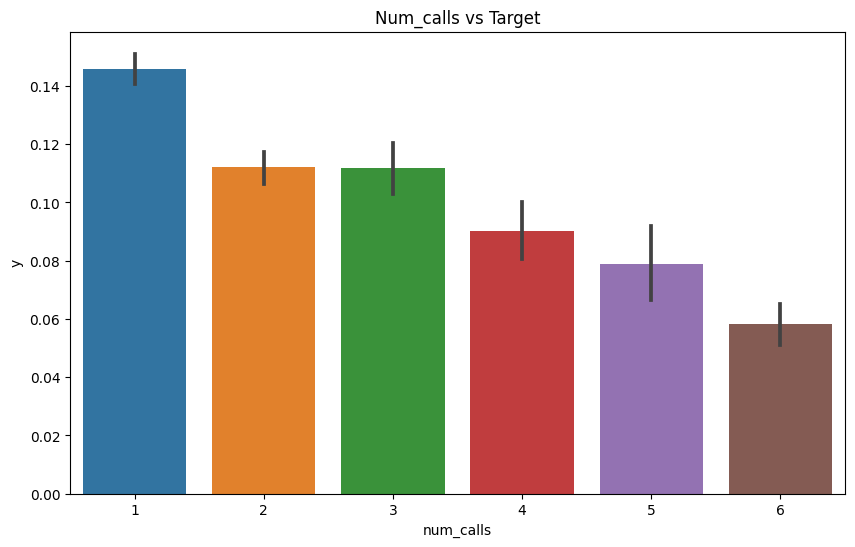

In [54]:
# Plotting the figure using barplot
sort = sorted(data['num_calls'].unique())
plt.figure(figsize=(10,6))
sns.barplot(x='num_calls', y='y', data=data, order=sort)
plt.xticks(rotation=0)
plt.title('Num_calls vs Target')
plt.show()

we can see that no 1 has the highest conversion rate.

# Dur

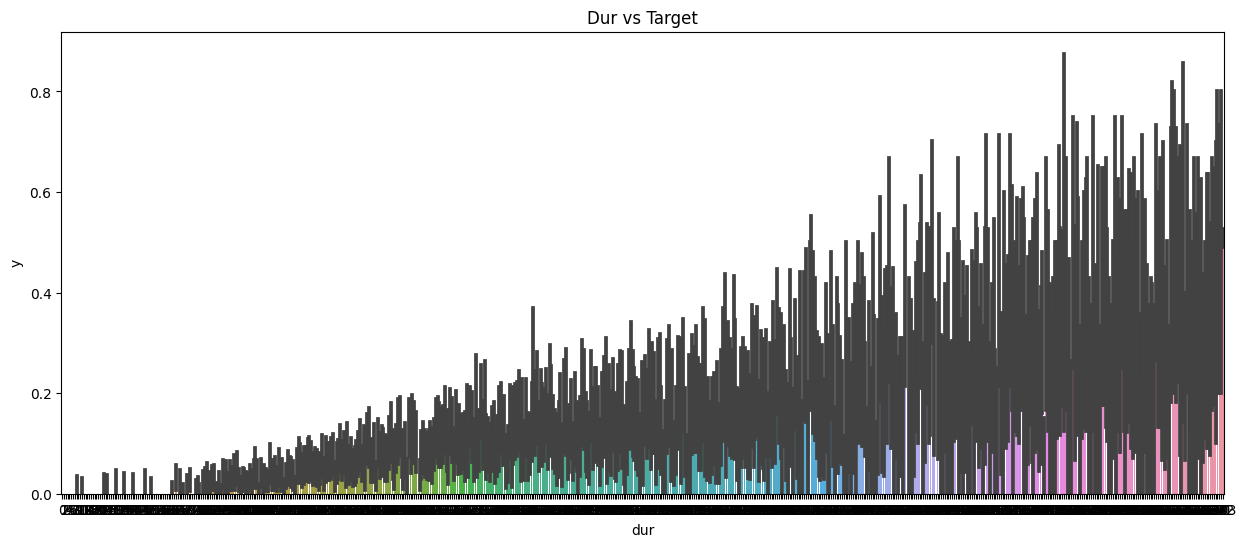

In [55]:
# Plotting the figure using barplot
sort_dur = sorted(data['dur'].unique())
plt.figure(figsize=(15,6))
sns.barplot(x='dur', y='y', data=data, order=sort_dur)
plt.xticks(rotation=0)
plt.title('Dur vs Target')
plt.show()

The plot is not clear and it is difficult to understand the conversion rate.



# **Features Vs Target plots together (for our reference)**

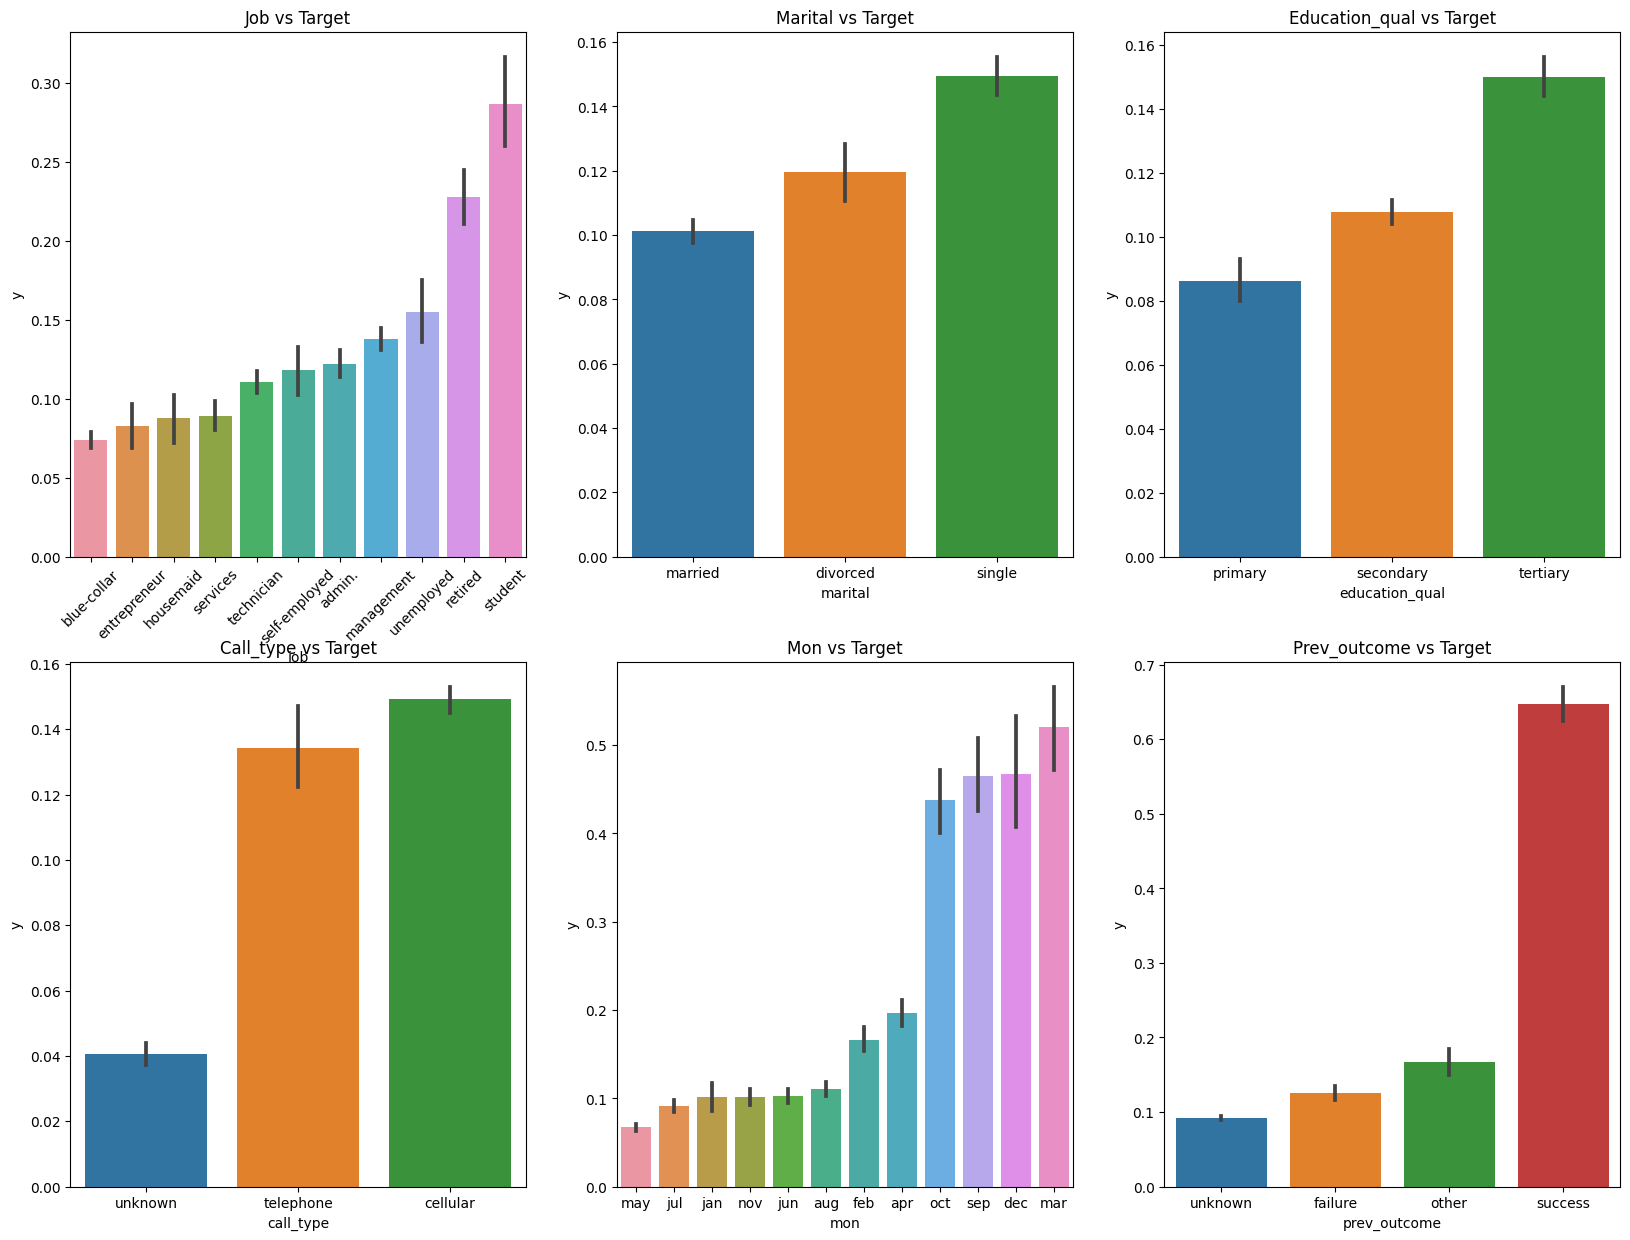

<Figure size 640x480 with 0 Axes>

In [56]:
# Plotting the figure using barplot
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=45)
plt.title('Job vs Target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=0)
plt.title('Marital vs Target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=0)
plt.title('Education_qual vs Target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=0)
plt.title('Call_type vs Target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=0)
plt.title('Mon vs Target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=0)
plt.title('Prev_outcome vs Target')

plt.show()
plt.tight_layout()

# **Finding Conversion rate for Age & Duration**

# **Age**

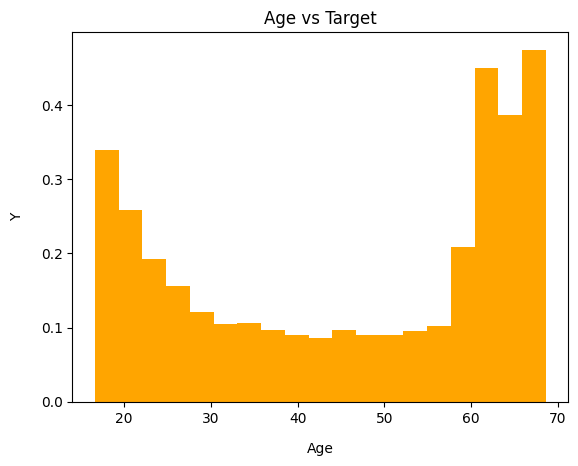

In [57]:
bins = np.linspace(data.age.min(), data.age.max(), 20)
c = np.digitize(data.age, bins)

# Define colors for each bar based on the condition
colors = ['blue' if i == 1 else 'orange' for i in c]

plt.bar(
    bins[:-1],
    [np.mean(data.y.values[c == i]) for i in range(1, len(bins))],
    width=bins[1] - bins[0],
    color=colors  # Adding the colors parameter
)

plt.title('Age vs Target')  # Adding the title
plt.xlabel('Age', labelpad=12)
plt.ylabel('Y', labelpad=12)
plt.show()

# **Dur**

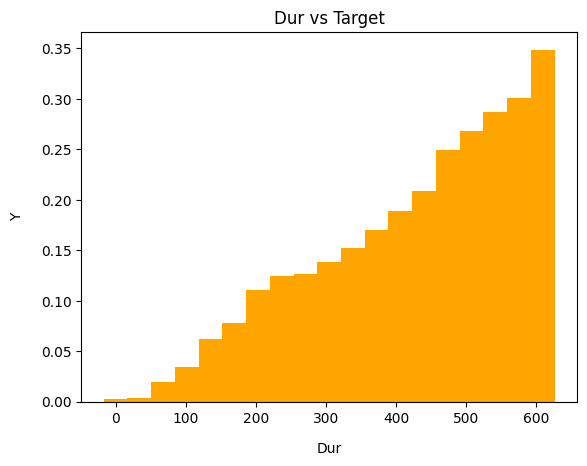

In [58]:
bins = np.linspace(data.dur.min(), data.dur.max(), 20)
c = np.digitize(data.dur, bins)

# Define colors for each bar based on the condition
colors = ['blue' if i == 1 else 'orange' for i in c]

plt.bar(
    bins[:-1],
    [np.mean(data.y.values[c == i]) for i in range(1, len(bins))],
    width=bins[1] - bins[0],
    color=colors  # Adding the colors parameter
)

plt.title('Dur vs Target')  # Adding the title
plt.xlabel('Dur', labelpad=12)
plt.ylabel('Y', labelpad=12)
plt.show()

# Encoding the data

In [59]:
# Checking the data types before encoding
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# **Label Encoding**

In [60]:
data['job'] = data['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})
data['education_qual'] = data['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})
data['marital'] = data['marital'].map({'married':0, 'divorced':1, 'single':2})

data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,unknown,5,may,261,1,unknown,0
1,44,4,2,1,unknown,5,may,151,1,unknown,0
2,33,1,0,1,unknown,5,may,76,1,unknown,0
3,47,0,0,1,unknown,5,may,92,1,unknown,0
4,33,0,2,1,unknown,5,may,198,1,unknown,0


# **One Hot Encoding**

In [61]:
data= pd.get_dummies(data, columns=['call_type','mon','prev_outcome'])

data.head()

,age,job,marital,education_qual,day,dur,num_calls,y,call_type_cellular,call_type_telephone,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,7,0,2,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,4,2,1,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,1,0,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,0,1,5,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,2,1,5,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# **Target and Feature**

In [62]:
X = data[['age','job','marital','education_qual','day','dur','num_calls','call_type_cellular','call_type_telephone','call_type_unknown','mon_apr',
          'mon_aug','mon_dec','mon_feb','mon_jan','mon_jul','mon_jun','mon_mar','mon_may','mon_nov','mon_oct','mon_sep','prev_outcome_failure','prev_outcome_other','prev_outcome_success','prev_outcome_unknown']].values

y = data['y'].values

# **Splitting the data**

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36164, 26), (9041, 26), (36164,), (9041,))

# **Balancing the data using (SMOTEENN)**

In [65]:
# Balancing the data using SMOTEENN

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

In [66]:
# Checking whether it is balanced or not
print(len(X_train))
print(len(y_train))

51375
51375


# **Scaling the data**

In [67]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Modelling**

### **1) Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Creating an instance to LR
Lr = LogisticRegression()

# fitting the model to training dataset
Lr.fit(X_train,y_train)

# To find the Training accuracy
Lr.score(X_train,y_train)

# To make predictions on the test dataset
y_pred = Lr.predict(X_test)

print("Training Accuracy :",Lr.score(X_train,y_train))
print("Testing Accuracy :",Lr.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9361751824817518
Testing Accuracy : 0.8274527154075877
F1 Score : 0.5243902439024392
ROC AUC Score : 0.8155787095154406


In [69]:
# Training Accuracy for Linear Regression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr.score(X_train,y_train)

lr_Train = Lr.score(X_train,y_train)
print(lr_Train)

0.9361751824817518


In [70]:
# Testing accuracy for Linear Regression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr.score(X_test,y_test)

lr_Test = Lr.score(X_test,y_test)
print(lr_Test)

0.8274527154075877


In [71]:
# ROC AUC score for Linear Regression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)

lr_auroc = roc_auc_score(y_test, y_pred)

print(lr_auroc)

0.8155787095154406


In [72]:
# F1_Score for Linear Regression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)

lr_f1 = f1_score(y_test, y_pred)
lr_f1

0.5243902439024392

# **2) Decision Tree**

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
    dt = DecisionTreeClassifier(max_depth=depth) #this will stop the tree when it reaches the max depth

    # fitting the model to training dataset
    dt.fit(X_train, y_train)
    # To find the Training accuracy
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train))

    #By setting the maximum depth for DTC
    dt = DecisionTreeClassifier(max_depth=depth)

    #It evaluvate the classifier using K-Fold cross validation
    #No of folds is 10
    #the performance metric used for the model is F1 Score so 'Scoring' = 'f1'
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring='f1')

    #setting the max depth for another DTC
    dt = DecisionTreeClassifier(max_depth=depth)
    #Training the model
    dt.fit(X_train,y_train)

    #predicting the test dataset
    y_pred = dt.predict(X_test)

    #Used to evaluvate the binary classification models
    roc = roc_auc_score(y_test,y_pred)

    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7959513381995134  Cross val score :  0.8263677136716658
Depth  :  2  Training Accuracy :  0.8316885644768857  Cross val score :  0.8627211811970996
Depth  :  3  Training Accuracy :  0.8808953771289537  Cross val score :  0.9023520650551227
Depth  :  4  Training Accuracy :  0.892301703163017  Cross val score :  0.9103736972696914
Depth  :  5  Training Accuracy :  0.9067639902676399  Cross val score :  0.9179891127205048
Depth  :  6  Training Accuracy :  0.9211484184914842  Cross val score :  0.9288703861479439
Depth  :  7  Training Accuracy :  0.9338588807785888  Cross val score :  0.9390948213546861
Depth  :  8  Training Accuracy :  0.9447980535279805  Cross val score :  0.9460502897442916
Depth  :  9  Training Accuracy :  0.9517664233576643  Cross val score :  0.949444120342864
Depth  :  10  Training Accuracy :  0.9607591240875912  Cross val score :  0.9553384518914827
Depth  :  20  Training Accuracy :  0.9991824817518248  Cross val score :  0.95953

In [74]:
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)
print("Training Accuracy :",t.score(X_train,y_train))
print("Testing Accuracy :",t.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.8494635549164915
F1 Score : 0.5285763768617942
ROC AUC Score : 0.7890413910281487


In [75]:
# Training Accuracy for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
t.score(X_train,y_train)

dt_train = t.score(X_train,y_train)
print(dt_train)

1.0


In [76]:
# Testing Accuracy for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
t.score(X_train,y_train)

dt_test = t.score(X_test,y_test)
print(dt_test)

0.8509014489547616


In [77]:
# F1_Score for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)

dt_f1 = f1_score(y_test,y_pred)
print(dt_f1)

0.5278733654507914


In [78]:
# ROC AUC score for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)

dt_auroc = roc_auc_score(y_test, y_pred)
print(dt_auroc)

0.7905365244148095


# **Feature Importance**

In [79]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [80]:
X_test = pd.DataFrame(X_test, columns = ['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'])

# Creating instance of decision tree classifier with maximum depth
dtc = DecisionTreeClassifier(max_depth=40)

# Fitting the model with training data for prediction
dtc.fit(X_train, y_train)

# this retrieves the feature importance from the model
importance = dtc.feature_importances_

# this combines the feature names and its importance in a list of tuples
feature_importances = list(zip(X_test.columns, importance))

# This sorts the values in descending order (gets the second element of each tuple)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Finding the maximum length of feature names for consistent spacing
max_length = max(len(feature) for feature, _ in feature_importances)

# Printing the sorted feature importances with consistent spacing
for feature, importance in feature_importances:
    spacing = ' ' * (max_length - len(feature) + 1)
    print(feature + ':' + spacing, importance)


dur:                   0.46261123122641784
prev_outcome_unknown:  0.1092319688677789
prev_outcome_failure:  0.06861894274806517
call_type_unknown:     0.06847234877180598
age:                   0.044074095034420765
day:                   0.04111643128669977
prev_outcome_other:    0.03713712484531453
mon_may:               0.024810797700194995
mon_jul:               0.023086680549404066
mon_nov:               0.019199436720391202
mon_aug:               0.01738565207127643
job:                   0.0152536257532426
mon_feb:               0.012126635859705106
mon_apr:               0.011485715897742109
mon_jan:               0.01023531661259814
num_calls:             0.01022543384068944
marital:               0.004645637218824735
education_qual:        0.004117801552364741
call_type_telephone:   0.0031684349711108067
prev_outcome_success:  0.00293213461002419
mon_jun:               0.0025943254806111648
mon_oct:               0.0022188226110679936
call_type_cellular:    0.00198765185010769

The Feature importance is

1) Duration of the call

2) Previous outcome unknown

3) Call type unknown

# **3) K-Nearest Neighbour**

In [81]:
from sklearn.neighbors import KNeighborsClassifier

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn= KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print("K value  : " , i, " Train score : ", knn.score(X_train,y_train) , " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')))

K value  :  1  Train score :  1.0  Cross val score :  0.9949695201863984
K value  :  2  Train score :  0.9996885644768857  Cross val score :  0.9953104584024534
K value  :  3  Train score :  0.9964379562043796  Cross val score :  0.9858088831580781
K value  :  4  Train score :  0.9962238442822384  Cross val score :  0.9864140416142204
K value  :  5  Train score :  0.9877761557177616  Cross val score :  0.9746512964495911
K value  :  6  Train score :  0.9884963503649635  Cross val score :  0.9771057830105121
K value  :  7  Train score :  0.9778491484184915  Cross val score :  0.9667525986104557
K value  :  8  Train score :  0.9799124087591241  Cross val score :  0.9688747480076685
K value  :  9  Train score :  0.9693430656934306  Cross val score :  0.959450030082024
K value  :  10  Train score :  0.97130900243309  Cross val score :  0.9616696154952862
K value  :  20  Train score :  0.9391338199513382  Cross val score :  0.9374695744930645
K value  :  30  Train score :  0.919844282238442

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :",knn.score(X_train,y_train))
print("Testing Accuracy :",knn.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9962238442822384
Testing Accuracy : 0.7121999778785533
F1 Score : 0.3730120481927711
ROC AUC Score : 0.7155736881747425


In [83]:
# Training Accuracy for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

knn_train = knn.score(X_train,y_train)
print(knn_train)

0.9962238442822384


In [84]:
# Testing Accuracy for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

knn_test = knn.score(X_test,y_test)
print(knn_test)

0.7121999778785533


In [85]:
# F1_Score for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn_f1 = f1_score(y_test,y_pred)
print(knn_f1)

0.3730120481927711


In [86]:
# ROC AUC score for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn_auroc = roc_auc_score(y_test, y_pred)
print(knn_auroc)

0.7155736881747425


# **4) XG-Boost**

In [87]:
import xgboost as xgb
from xgboost import XGBClassifier
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
       model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0)
       model.fit(X_train,y_train)
       model.score(X_test, y_test)

       print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='f1')))

Learning rate :  0.01  Train score :  0.9394452554744526  Cross-Val score :  0.9429019963477243
Learning rate :  0.02  Train score :  0.9507153284671532  Cross-Val score :  0.95229159352498
Learning rate :  0.03  Train score :  0.9567883211678833  Cross-Val score :  0.9570904942737659
Learning rate :  0.04  Train score :  0.965625304136253  Cross-Val score :  0.9639429421844807
Learning rate :  0.05  Train score :  0.9694598540145986  Cross-Val score :  0.9659800101941791
Learning rate :  0.06  Train score :  0.9717566909975669  Cross-Val score :  0.9672972241037104
Learning rate :  0.07  Train score :  0.9737615571776156  Cross-Val score :  0.9680636147681174
Learning rate :  0.08  Train score :  0.9747931873479319  Cross-Val score :  0.9685392306465882
Learning rate :  0.09  Train score :  0.9755328467153285  Cross-Val score :  0.9687832374759775
Learning rate :  0.1  Train score :  0.9767980535279805  Cross-Val score :  0.9691645867101302
Learning rate :  0.11  Train score :  0.9775

In [88]:
xg = XGBClassifier(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy :",xg.score(X_train,y_train))
print("Testing Accuracy :",xg.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.997742092457421
Testing Accuracy : 0.8711425727242562
F1 Score : 0.5864394746183883
ROC AUC Score : 0.8266916955199132


In [89]:
# Training Accuracy for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)

xg_train = xg.score(X_train,y_train)
print(xg_train)

0.9937712895377129


In [90]:
# Testing Accuracy for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)

xg_test = xg.score(X_test,y_test)
print(xg_test)

0.8705895365556907


In [91]:
# F1_Score for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

xg_f1 = f1_score(y_test,y_pred)
print(xg_f1)

0.5891853932584269


In [92]:
# ROC AUC Score for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

xg_auroc = roc_auc_score(y_test, y_pred)
print(xg_auroc)

0.8316084054907777


# **Feature Importance for XG-Boost**

In [93]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [94]:
X_test = pd.DataFrame(X_test, columns = ['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'])

# Creating instance of decision tree classifier with maximum depth
xgboost_model = xgb.XGBClassifier(learning_rate = 0.5)

# Fitting the model with training data for prediction
xgboost_model.fit(X_train, y_train)

# this retrieves the feature importance from the model
importance = xgboost_model.feature_importances_

# this combines the feature names and its importance in a list of tuples
feature_importances = list(zip(X_test.columns, importance))

# This sorts the values in descending order (gets the second element of each tuple)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Finding the maximum length of feature names for consistent spacing
max_length = max(len(feature) for feature, _ in feature_importances)

# Printing the sorted feature importances with consistent spacing
for feature, importance in feature_importances:
    spacing = ' ' * (max_length - len(feature) + 1)
    print(feature + ':' + spacing, importance)

prev_outcome_failure:  0.15468112
call_type_unknown:     0.13844742
prev_outcome_other:    0.12096939
prev_outcome_unknown:  0.112480804
mon_may:               0.06329206
mon_nov:               0.06208166
mon_aug:               0.0610903
mon_jul:               0.056772858
mon_jan:               0.0389697
dur:                   0.038555104
mon_feb:               0.026725516
mon_apr:               0.024039088
mon_jun:               0.013930668
prev_outcome_success:  0.013717785
mon_oct:               0.009703025
mon_mar:               0.008616345
num_calls:             0.008422247
mon_sep:               0.007926573
call_type_cellular:    0.0072931065
call_type_telephone:   0.0060571036
mon_dec:               0.005982124
job:                   0.0054981695
day:                   0.005446419
age:                   0.0048899353
education_qual:        0.0024456384
marital:               0.0019658606


The feature importance is:

call_type Unknown

Prev_outcome_failure

prev_outcome_other

# **Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
random.fit(X_train, y_train)
y_pred= random.predict(X_test)

In [96]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
    random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
    random.fit(X_train, y_train)
    random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
    valAccuracy = cross_val_score(random, X_train, y_train, cv=10, scoring='f1')

    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  1.0  Cross val score :  0.88883056314929
Depth  :  2  Training Accuracy :  1.0  Cross val score :  0.8935166153832096
Depth  :  3  Training Accuracy :  1.0  Cross val score :  0.8936581927011836
Depth  :  4  Training Accuracy :  1.0  Cross val score :  0.889146019619233
Depth  :  5  Training Accuracy :  1.0  Cross val score :  0.8910987867412719
Depth  :  6  Training Accuracy :  1.0  Cross val score :  0.8901257048866814
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.8884513027371232
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.8938738232124008
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.8872243432403699
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.8879059401830048


In [97]:
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)
print("Training Accuracy :",random.score(X_train,y_train))
print("Testing Accuracy :",random.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))

Training Accuracy : 0.9634452554744526
Testing Accuracy : 0.8361906868709214
F1 Score : 0.5556555655565557
ROC AUC Score : 0.8470923517974648


In [98]:
# Training Accuracy for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
random.score(X_train,y_train)

random_train = random.score(X_train,y_train)
print(random_train)

0.9630559610705596


In [99]:
# Testing Accuracy for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
random.score(X_train,y_train)

random_test = random.score(X_test,y_test)
print(random_test)

0.8377391881429046


In [100]:
# F1_Score for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)

random_f1 = f1_score(y_test,predictions)
print(random_f1)

0.5508196721311476


In [101]:
# ROC AUC score for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)

random_auroc = roc_auc_score(y_test,predictions)
print(random_auroc)

0.8452318866811858


In [102]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

# **Conclusion**

In [103]:
# Creating a dataframe to analyse the best value of F1_Score
models = {'Model_Classifier':['Logistic Regression','Decision Tree','K-Nearest Neighbour','XG-Boost','Random Forest'],
          'Train_Accuracy':[lr_Train,dt_train,knn_train,xg_train,random_train],
          'Test_Accuracy': [lr_Test,dt_test,knn_test,xg_test,random_test],
          'roc_auc_score': [lr_auroc,dt_auroc,knn_auroc,xg_auroc,random_auroc],
          'F1_Score':      [lr_f1,dt_f1,knn_f1,xg_f1,random_f1]}

In [104]:
# Assuming `models` is a list of models
mdf = pd.DataFrame(models)

# Applying alignment using the `style` attribute
mdf_styled = mdf.style.set_properties(**{'text-align': 'center', 'white-space': 'pre'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Displaying the styled dataframe
display(mdf_styled)

,Model_Classifier,Train_Accuracy,Test_Accuracy,roc_auc_score,F1_Score
0,Logistic Regression,0.936175,0.827453,0.815579,0.524390
1,Decision Tree,1.000000,0.850901,0.790537,0.527873
2,K-Nearest Neighbour,0.996224,0.712200,0.715574,0.373012
3,XG-Boost,0.993771,0.870590,0.831608,0.589185
4,Random Forest,0.963056,0.837739,0.845232,0.550820


After building the Model, the important features for Customer Conversion Predictions for an insurance company are :

prev_outcome_unknown : the customers failed to share the details of unknown plays ideal role to subscribe for an insurance.

prev_outcome_failure : The prev_outcome failed and that is a important role to subscribe for an insurance.

Duration of call : The amount of time spent with the customer during the call, may have major impact in the conversion.

Hence, XG-Boost classifier gives the highest value for F1_Score